# EJERCICIO 1

In [1]:
import time
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (5,5)

In [2]:
class XORShiftGenerator:
    
  PERIOD = (2**64) 
 
  def __init__(self,external_seed):
    self.seed = external_seed % self.PERIOD

  def random(self):
    seed_tuple = (23,13,58)
    self.seed = (self.seed ^ (self.seed << seed_tuple[0])) % self.PERIOD
    self.seed = (self.seed ^ (self.seed >> seed_tuple[1])) % self.PERIOD
    self.seed = (self.seed ^ (self.seed << seed_tuple[2])) % self.PERIOD
    return self.seed
    
  def u_random(self):
    return self.random() / self.PERIOD


In [3]:
generator = XORShiftGenerator(int(time.time()))

generated = []
uniform_generated = []
for i in range(1000):
    generated.append(generator.random())
    uniform_generated.append(generator.u_random())

In [4]:
class GCL: #Generador ejercicio 6
    # datos provistos
    m = 2**32
    a = 1013904223
    c = 1664525
    
    def __init__(self,seed):
        self.xn = seed
        
    def random(self):
        self.xn = (self.c + self.xn*self.a) % self.m
        return self.xn

    def u_random(self):
        return self.random() / self.m

In [5]:
gcl_generator = GCL(int((99289 + 96453 + 100853 + 97839 )/4)) # parte entera del promedio de los padrones

gcl_generated = []
gcl_uniform_generated = []
for i in range(1000):
    gcl_generated.append(gcl_generator.random())
    gcl_uniform_generated.append(gcl_generator.u_random())

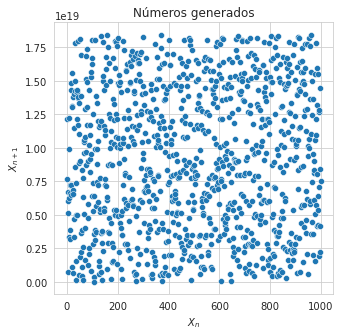

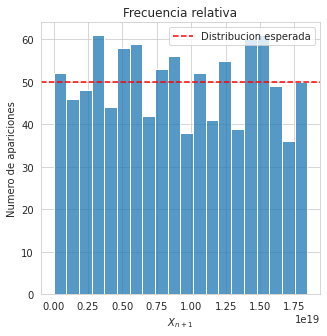

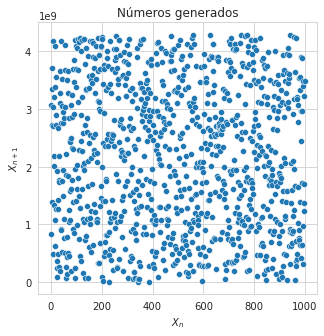

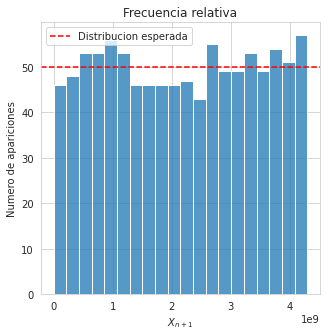

In [6]:
sns.scatterplot(data=generated)
plt.title('Números generados')
plt.ylabel("$X_{n+1}$")
plt.xlabel("$X_n$")
plt.show()

sns.histplot(data=generated,bins=20)
plt.axhline(
    y=1000 / 20,
    xmin=0,
    xmax=1,
    color="r",
    linestyle="--",
    label="Distribucion esperada",
)
plt.title('Frecuencia relativa')
plt.ylabel("Numero de apariciones")
plt.xlabel("$X_{n+1}$")
plt.legend()
plt.show()

sns.scatterplot(data=gcl_generated)
plt.title('Números generados')
plt.ylabel("$X_{n+1}$")
plt.xlabel("$X_n$")
plt.show()

sns.histplot(data=gcl_generated,bins=20)
plt.title('Frecuencia relativa')
plt.ylabel("Numero de apariciones")
plt.xlabel("$X_{n+1}$")
plt.axhline(
    y=1000 / 20,
    xmin=0,
    xmax=1,
    color="r",
    linestyle="--",
    label="Distribucion esperada",
)
plt.legend()
plt.show()

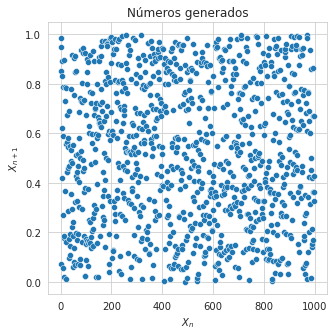

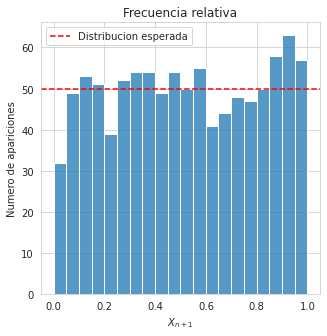

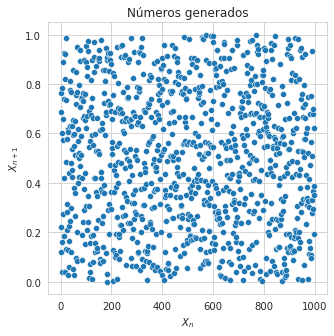

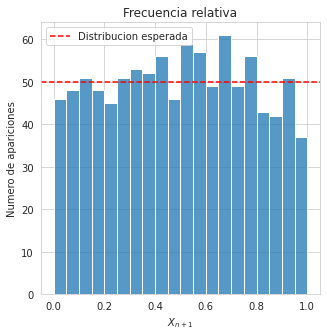

In [7]:
sns.scatterplot(data=uniform_generated)
plt.title('Números generados')
plt.ylabel("$X_{n+1}$")
plt.xlabel("$X_n$")
plt.show()

sns.histplot(data=uniform_generated,bins=20)
plt.title('Frecuencia relativa')
plt.ylabel("Numero de apariciones")
plt.xlabel("$X_{n+1}$")
plt.axhline(
    y=1000 / 20,
    xmin=0,
    xmax=1,
    color="r",
    linestyle="--",
    label="Distribucion esperada",
)
plt.legend()
plt.show()

sns.scatterplot(data=gcl_uniform_generated)
plt.title('Números generados')
plt.ylabel("$X_{n+1}$")
plt.xlabel("$X_n$")
plt.show()

sns.histplot(data=gcl_uniform_generated,bins=20)
plt.axhline(
    y=1000 / 20,
    xmin=0,
    xmax=1,
    color="r",
    linestyle="--",
    label="Distribucion esperada",
)
plt.title('Frecuencia relativa')
plt.ylabel("Numero de apariciones")
plt.xlabel("$X_{n+1}$")
plt.legend()
plt.show()

# EJERCICIO 2

### Test de Kolmogorov

In [20]:
from scipy.stats import kstest
import numpy as np

generator = XORShiftGenerator(int(time.time()))

def generate_sample(longitud):
    sample = []
    for i in range(longitud):
      sample.append(generator.u_random())
    return sample

def kol_test_sample(sample):
    tested = kstest(sample, 'uniform')
    if tested[1] >= 0.05:
        print("El test acepta la hipotesis nula.")
    else:
        print("El test rechaza la hipótesis nula")
    print("Estadistico: {:.4f} ".format(tested[0]))
    print("P Valor: {:.4f} ".format(tested[1]))

In [21]:
big_sample = generate_sample(10000)
kol_test_sample(big_sample)

El test acepta la hipotesis nula.
Estadistico: 0.0133 
P Valor: 0.0589 


In [22]:
small_sample = generate_sample(1000)
kol_test_sample(small_sample)

El test acepta la hipotesis nula.
Estadistico: 0.0143 
P Valor: 0.9848 


In [23]:
def gcl_generate_sample(longitud):
    sample = []
    for i in range(longitud):
      sample.append(gcl_generator.u_random())
    return sample

In [24]:
gcl_big_sample = gcl_generate_sample(10000)
kol_test_sample(gcl_big_sample)

El test acepta la hipotesis nula.
Estadistico: 0.0102 
P Valor: 0.2470 


In [25]:
gcl_small_sample = gcl_generate_sample(1000)
kol_test_sample(gcl_small_sample)

El test acepta la hipotesis nula.
Estadistico: 0.0275 
P Valor: 0.4274 


### Test 2

### Test 3